In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

C:\Users\LG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('Gold_data.csv')
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [3]:
df1 = data.reset_index()['price']

In [4]:
df1

0       2252.60
1       2454.50
2       2708.10
3       2577.80
4       2597.75
         ...   
2177    4394.40
2178    4389.50
2179    4389.50
2180    4354.10
2181    4346.50
Name: price, Length: 2182, dtype: float64

In [5]:
df1.shape

(2182,)

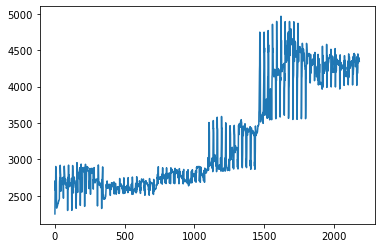

In [6]:
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as  np
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1.shape

(2182, 1)

In [9]:
df1

array([[0.        ],
       [0.07440027],
       [0.16785201],
       ...,
       [0.78744887],
       [0.77440395],
       [0.77160335]])

###  spliting the data

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
train_data.shape,test_data.shape

((1418, 1), (764, 1))

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(1317, 100)
(1317,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(663, 100)
(663,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 15s 339ms/step - loss: 0.0104 - val_loss: 0.0569
Epoch 2/100
21/21 [==============================] - 5s 257ms/step - loss: 0.0034 - val_loss: 0.0175
Epoch 3/100
21/21 [==============================] - 5s 247ms/step - loss: 0.0024 - val_loss: 0.0076
Epoch 4/100
21/21 [==============================] - 5s 241ms/step - loss: 0.0024 - val_loss: 0.0071
Epoch 5/100
21/21 [==============================] - 5s 241ms/step - loss: 0.0024 - val_loss: 0.0078
Epoch 6/100
21/21 [==============================] - 5s 243ms/step - loss: 0.0023 - val_loss: 0.0067
Epoch 7/100
21/21 [==============================] - 5s 239ms/step - loss: 0.0023 - val_loss: 0.0081
Epoch 8/100
21/21 [==============================] - 5s 243ms/step - loss: 0.0022 - val_loss: 0.0149
Epoch 9/100
21/21 [==============================] - 5s 240ms/step - loss: 0.0021 - val_loss: 0.0191
Epoch 10/100
21/21 [==============================] - 5s 244ms/step - loss: 0.0021 - val_l

In [21]:
import tensorflow as tf

In [22]:
tf.__version__

'2.9.1'

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

21/21 [==============================] - 1s 52ms/step


In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2820.1019670740598

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4149.444721005362

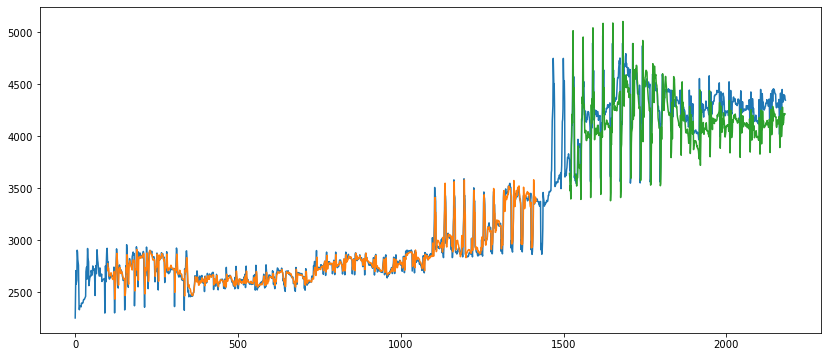

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(14,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In above plot blue line determine the actual values and orrenge line determine the predicted value for train data and green line determine the predicted values for test data. Its giving better results we finalize the LSTM model

In [28]:
len(test_data)

764

In [29]:
x_input=test_data[664:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.7307734826988981,
 0.7430077016619374,
 0.7289309798430186,
 0.6960238788370121,
 0.6962818292368353,
 0.6994140840918304,
 0.6994140840918304,
 0.7080001474002284,
 0.7183918635073885,
 0.7133065556251612,
 0.6963923794081879,
 0.6950289272948373,
 0.6983085823783028,
 0.6983085823783028,
 0.6974241810074804,
 0.6908280207834323,
 0.6873272653572613,
 0.7125695544828095,
 0.7733721487268306,
 0.756236872167152,
 0.6529093120094336,
 0.7115746029406347,
 0.7671444890739578,
 0.8095220547591848,
 0.7633489331908465,
 0.6916755720971368,
 0.7252828241883775,
 0.7316210340126028,
 0.794745181855032,
 0.7667022883885468,
 0.76589158713196,
 0.7645649850757268,
 0.7396543464642371,
 0.7367800420090651,
 0.7367800420090651,
 0.7405755978921769,
 0.7422707005195857,
 0.7497881121715739,
 0.7500829126285147,
 0.7611010797066735,
 0.759995577993146,
 0.7599587279360283,
 0.7732247484983601,
 0.7606220289641448,
 0.7655967866750193,
 0.7612484799351438,
 0.7510041640564544,
 0.750635663485278

In [32]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.71343565]
101
1 day input [0.7430077  0.72893098 0.69602388 0.69628183 0.69941408 0.69941408
 0.70800015 0.71839186 0.71330656 0.69639238 0.69502893 0.69830858
 0.69830858 0.69742418 0.69082802 0.68732727 0.71256955 0.77337215
 0.75623687 0.65290931 0.7115746  0.76714449 0.80952205 0.76334893
 0.69167557 0.72528282 0.73162103 0.79474518 0.76670229 0.76589159
 0.76456499 0.73965435 0.73678004 0.73678004 0.7405756  0.7422707
 0.74978811 0.75008291 0.76110108 0.75999558 0.75995873 0.77322475
 0.76062203 0.76559679 0.76124848 0.75100416 0.75063566 0.75063566
 0.7755463  0.73891735 0.65235656 0.7115746  0.76485979 0.79481888
 0.76334893 0.70748425 0.72476692 0.73338984 0.8064635  0.76681284
 0.81000111 0.81000111 0.81180676 0.79920404 0.80745845 0.79990419
 0.79503998 0.79286583 0.79286583 0.75859528 0.74525556 0.7447028
 0.74647161 0.76025353 0.76143273 0.76143273 0.75590522 0.74599256
 0.7740723  0.73165788 0.65021926 0.7067104  0.75649482 0.79632973
 0.76161698 0.71080075 0.72476692 0

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
len(df1)

2182

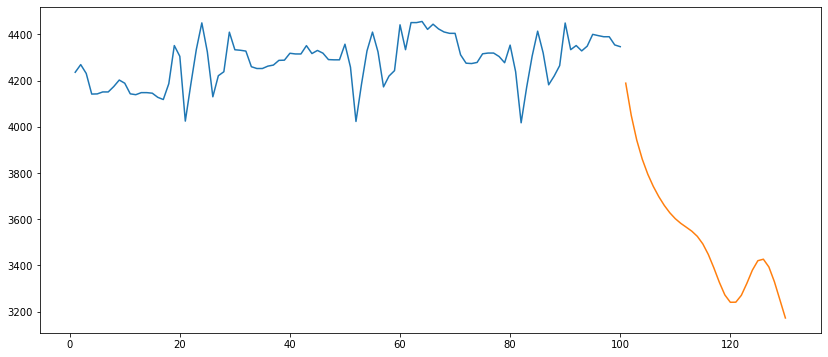

In [35]:
plt.figure(figsize=(14,6))
plt.plot(day_new,scaler.inverse_transform(df1[2082:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

The orenge line shows the forecasted values for next 30 days based on previous 100 days records.

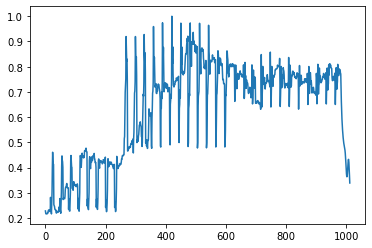

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.show()

In [37]:
df3=scaler.inverse_transform(df3).tolist()

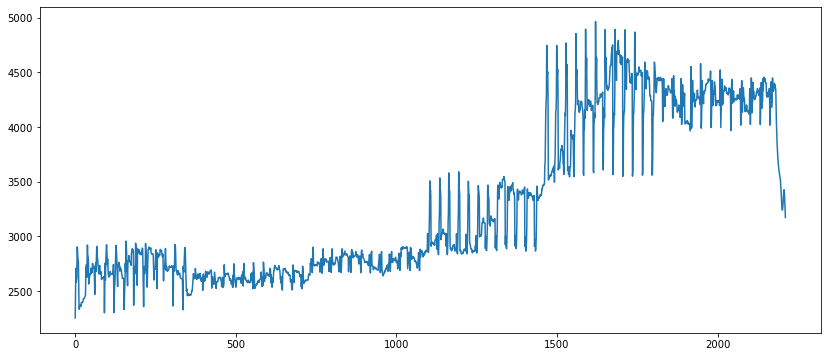

In [38]:
plt.figure(figsize=(14,6))
plt.plot(df3)
plt.show()

### Forecast for 1 year

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<365):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.76589159 0.76456499 0.73965435 0.73678004 0.73678004 0.7405756
 0.7422707  0.74978811 0.75008291 0.76110108 0.75999558 0.75995873
 0.77322475 0.76062203 0.76559679 0.76124848 0.75100416 0.75063566
 0.75063566 0.7755463  0.73891735 0.65235656 0.7115746  0.76485979
 0.79481888 0.76334893 0.70748425 0.72476692 0.73338984 0.8064635
 0.76681284 0.81000111 0.81000111 0.81180676 0.79920404 0.80745845
 0.79990419 0.79503998 0.79286583 0.79286583 0.75859528 0.74525556
 0.7447028  0.74647161 0.76025353 0.76143273 0.76143273 0.75590522
 0.74599256 0.7740723  0.73165788 0.65021926 0.7067104  0.75649482
 0.79632973 0.76161698 0.71080075 0.72476692 0.74146    0.8093378
 0.76681284 0.773409   0.76485979 0.77241405 0.79124443 0.78925452
 0.78744887 0.78744887 0.77440395 0.77160335 0.71343565 0.66211593
 0.62259591 0.59224367 0.56837207 0.54889941 0.53250086 0.51849949
 0.50675994 0.49729213 0.4898504  0.48367077 0.47738373 0.46914044
 0.45710906 0.44024435 0.41899946 0.39594346 0.375753

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,466)

In [41]:
len(df1)

2182

In [42]:
scaler.inverse_transform(lst_output)

array([[3100.91883994],
       [3040.34613817],
       [2991.57691701],
       [2954.25605626],
       [2927.73482062],
       [2910.9705348 ],
       [2902.41623016],
       [2900.11668329],
       [2901.94137517],
       [2906.31333269],
       [2912.17002587],
       [2919.45096052],
       [2928.39034939],
       [2938.47977453],
       [2948.72342746],
       [2956.31762973],
       [2958.64617012],
       [2955.07232322],
       [2946.89428748],
       [2937.0850927 ],
       [2928.46956602],
       [2925.72545168],
       [2932.91786913],
       [2947.36942554],
       [2964.96279694],
       [2981.00240625],
       [2992.37045822],
       [2997.57206744],
       [2994.70684344],
       [2984.23132314],
       [2966.68502074],
       [2947.03242123],
       [2928.12859886],
       [2913.68436161],
       [2906.23282206],
       [2907.45269352],
       [2917.51284207],
       [2935.90480934],
       [2961.15271543],
       [2990.99373054],
       [3022.60104609],
       [3053.577

The orenge line shows the forecasted values for next 30 days based on previous 100 days records.

In [43]:
forecast_data = pd.date_range(start="2020-12-22",end="2021-12-21",freq='D',name='Date')
forecast_data

DatetimeIndex(['2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [44]:
forecast_data = pd.DataFrame(data=forecast_data)
forecast_data

,Date
0,2020-12-22
1,2020-12-23
2,2020-12-24
3,2020-12-25
4,2020-12-26
...,...
360,2021-12-17
361,2021-12-18
362,2021-12-19
363,2021-12-20


In [45]:
forecast_data['price_new'] = scaler.inverse_transform(lst_output)

In [46]:
forecast_data

,Date,price_new
0,2020-12-22,3100.918840
1,2020-12-23,3040.346138
2,2020-12-24,2991.576917
3,2020-12-25,2954.256056
4,2020-12-26,2927.734821
...,...,...
360,2021-12-17,3609.301919
361,2021-12-18,3579.428877
362,2021-12-19,3541.335988
363,2021-12-20,3502.630069


In [47]:
data = data[['date','price']]
data['date'] = pd.to_datetime(data['date'])

In [48]:
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [49]:
full_data = pd.concat([data,forecast_data])
full_data[['price','price_new']]

,price,price_new
0,2252.60,NaN
1,2454.50,NaN
2,2708.10,NaN
3,2577.80,NaN
4,2597.75,NaN
...,...,...
360,NaN,3609.301919
361,NaN,3579.428877
362,NaN,3541.335988
363,NaN,3502.630069


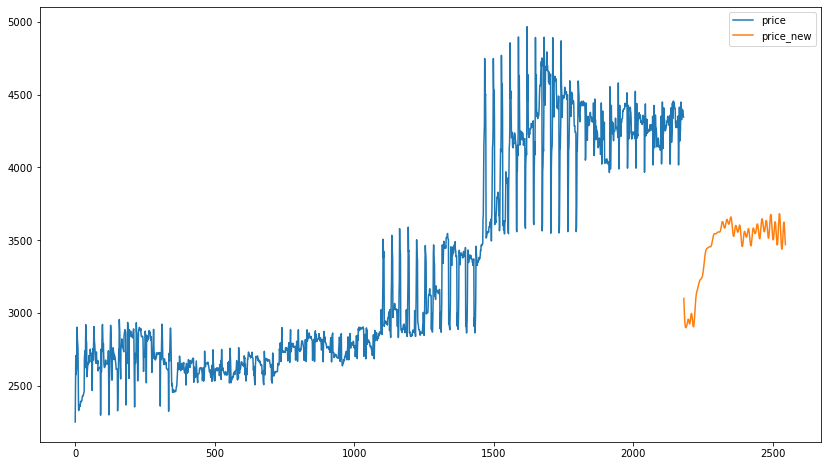

In [50]:
forecasting_plot = full_data[['price','price_new']].reset_index(drop=True).plot(figsize=(14,8))
forecasting_plot
plt.show()